# Receiver Operating Characteristic (ROC) Curve

## Axes

Axis Y (recall, sensitivy):
$$\text{True Positive Rate} = \frac{TP}{TP+FN}$$

Axis X:
$$\text{False Positive Rate} = \frac{FP}{FP+TN}$$

We use the thresholds to estimate the points of the ROC curve, and for that, we use different points which change the value of FPR and TPR. Analyzing the extremes cases of the thresholds:

- **The threshold equals 1** means there are no false positives or true positives values (because the maximum value is 1.0) and FPR/TPR becomes zero, i. e, point (0, 0)
- **The threshold equals 0** means every prediction is positive and I don't have false negatives or true negatives, i. e, point (1, 1)

## Example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1500, centers=2, n_features=2, random_state=123, cluster_std=1.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1200, 2), (1200,), (300, 2), (300,))

# negatives = 154
# positives = 146


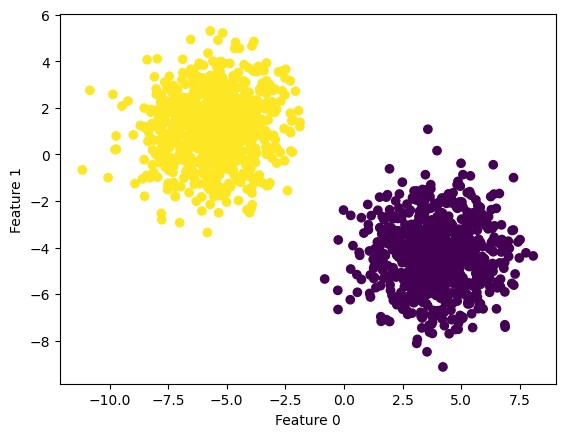

In [3]:
print(f"# negatives = {(y_test == 0).sum()}")
print(f"# positives = {(y_test == 1).sum()}")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

### Creating a no skill model

In this case, we only use a model that predicts one class which is zero, in this case, we have a straight line.

In [4]:
ns_preds = [0 for _ in range(len(y_test))]

In [5]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, ns_preds)

In [6]:
print(f"False Positive Rate: {fpr}")
print(f"True Positive Rate: {tpr}")
print(f"Thresholds: {thresholds}")

False Positive Rate: [0. 1.]
True Positive Rate: [0. 1.]
Thresholds: [1 0]


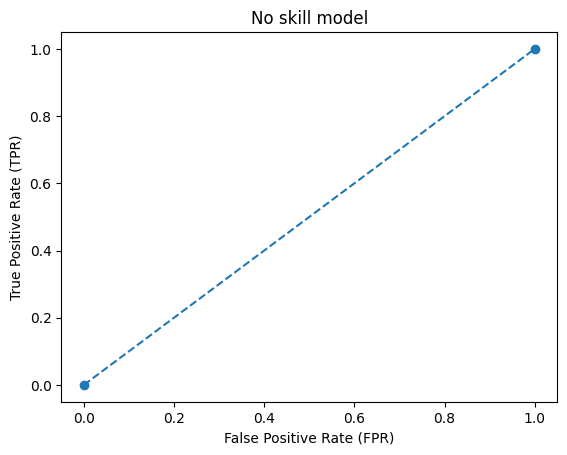

In [7]:
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr, linestyle="--")
plt.title("No skill model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

### Creating a trained model

In [8]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression().fit(X_train, y_train)
model

LogisticRegression()

False Positive Rate: [0. 0. 0. 1.]
True Positive Rate: [0.         0.00684932 1.         1.        ]
Thresholds: [1.99999991e+00 9.99999914e-01 9.95009862e-01 2.72855960e-08]


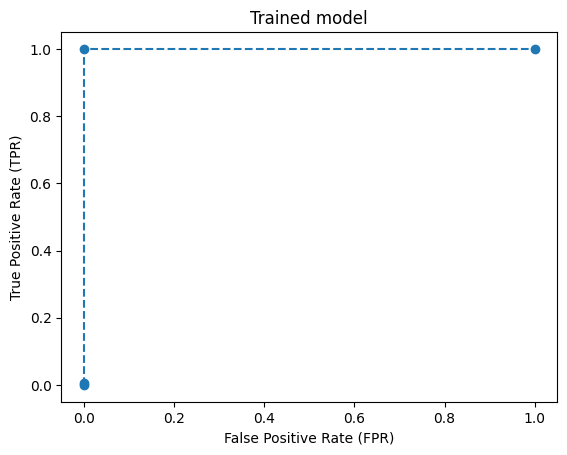

In [12]:
preds = model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds[:,1])  # We mantain only the positives outcomes
print(f"False Positive Rate: {fpr}")
print(f"True Positive Rate: {tpr}")
print(f"Thresholds: {thresholds}")
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr, linestyle="--")
plt.title("Trained model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

In this case, we have the scenario in which the model predicts perfect all classes. Let's create a new dataset with a high std value.

$$\sigma = 1.5 \rightarrow 5.0$$

In [13]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=123, cluster_std=5.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

# negatives = 93
# positives = 107


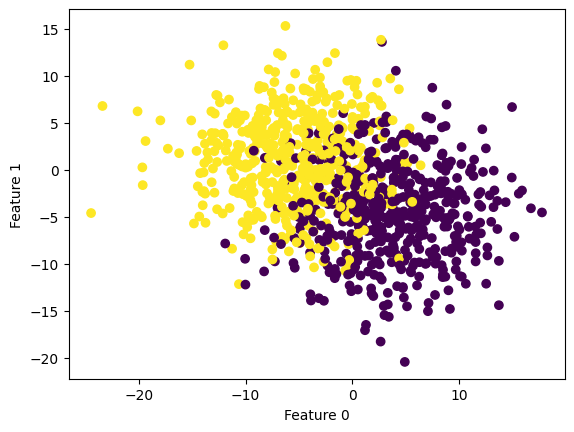

In [15]:
print(f"# negatives = {(y_test == 0).sum()}")
print(f"# positives = {(y_test == 1).sum()}")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

In [16]:
model = LogisticRegression().fit(X_train, y_train)
model

LogisticRegression()

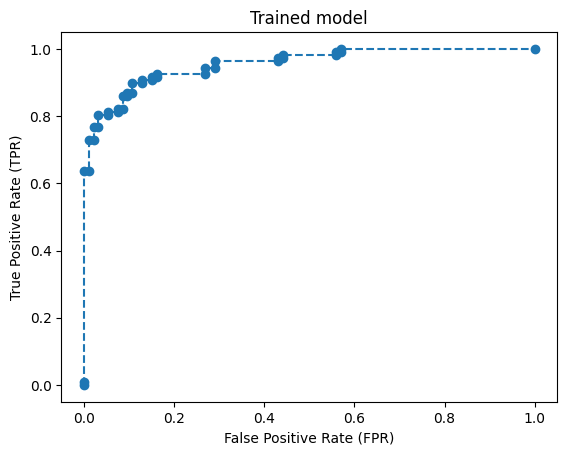

In [17]:
preds = model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds[:,1])  # We mantain only the positives outcomes
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr, linestyle="--")
plt.title("Trained model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

As you can see we have some wrong predictions, and we have a ROC curve in which the AUC (Area under Curve) is not 1 (perfect case)

# Area under Curve (AUC)

To choose the best model we can compute the area under the curve (ROC). The model with the higher value is the best.

$$0.5 < AUC < 1.0$$

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [21]:
model_tree = DecisionTreeClassifier().fit(X_train, y_train)
model_tree

DecisionTreeClassifier()

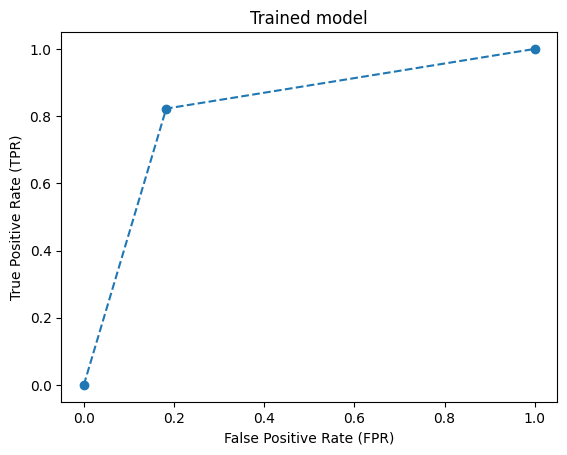

In [22]:
preds_tree = model_tree.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_tree[:,1])  # We mantain only the positives outcomes
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr, linestyle="--")
plt.title("Trained model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

## AUC Logistic Regression

In [23]:
print(f"AUC Logistic: {roc_auc_score(y_test, preds[:,1])}")
print(f"AUC Tree: {roc_auc_score(y_test, preds_tree[:,1])}")

AUC Logistic: 0.9553813687066626
AUC Tree: 0.8198171038086625


As you can see the logistic regression model for this case is better than the decision tree model.